In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# FaceNet PyTorch Implementation
!pip install facenet-pytorch

# Computer Vision and Image Processing
!pip install opencv-python-headless
!pip install Pillow

# Scientific Computing and Data Analysis
!pip install pandas scikit-learn
!pip install matplotlib seaborn

# Additional Utilities
!pip install pathlib2

# Optional: For better progress bars and utilities
!pip install tqdm

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 42.3 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.6.0+cu1

Environment Setup Complete!
PyTorch Version: 2.2.2+cu121
CUDA Available: False
Face Recognition Continual Learning Research Framework

Execution Options:
1. Run full experiment
2. Test single batch (for debugging)
3. Load and analyze previous results

>>> Running Full Experiment <<<
Starting Face Recognition Continual Learning Experiment
Setting up dataset...
Loaded 24 persons with sufficient images
Dataset setup complete. Total persons: 24
Train images per person - Min: 34, Max: 50, Avg: 44.6
Test images per person - Min: 1, Max: 1, Avg: 1.0
Created 5 batches of 5 persons each

==================== BATCH 1/5 ====================
Training persons: ['Laura_Bush', 'Junichiro_Koizumi', 'Vladimir_Putin', 'Nestor_Kirchner', 'Gloria_Macapagal_Arroyo']


  0%|          | 0.00/107M [00:00<?, ?B/s]

Model expanded to 5 classes
Prepared 217 training images
Class distribution: Counter({1: 49, 2: 48, 4: 44, 0: 40, 3: 36})

Training batch 1...
Batch 1, Epoch 1/20: Loss: 1.5460, Acc: 49.31%
Batch 1, Epoch 6/20: Loss: 0.6287, Acc: 88.48%
Batch 1, Epoch 11/20: Loss: 0.3202, Acc: 92.17%
Batch 1, Epoch 16/20: Loss: 0.2780, Acc: 93.09%
Batch 1 training completed in 431.67 seconds

Evaluating on all 5 trained persons...

--- Batch 1 Results ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
False Acceptance Rate: 0.0000
False Rejection Rate: 0.0000
Execution Time: 1.9350 seconds
Training Time: 431.6689 seconds
Model Size: 107.59 MB
Total Classes: 5
Test Samples: 5
Model saved to /content/drive/MyDrive/Colab Notebooks/results_2025_06_22_VGGFace_JT/facenet_batch_1.pth
Batch 1 completed successfully!

==================== BATCH 2/5 ====================
Training persons: ['Arnold_Schwarzenegger', 'Ariel_Sharon', 'George_W_Bush', 'Hugo_Chavez', 'Serena_Williams']
Model expande

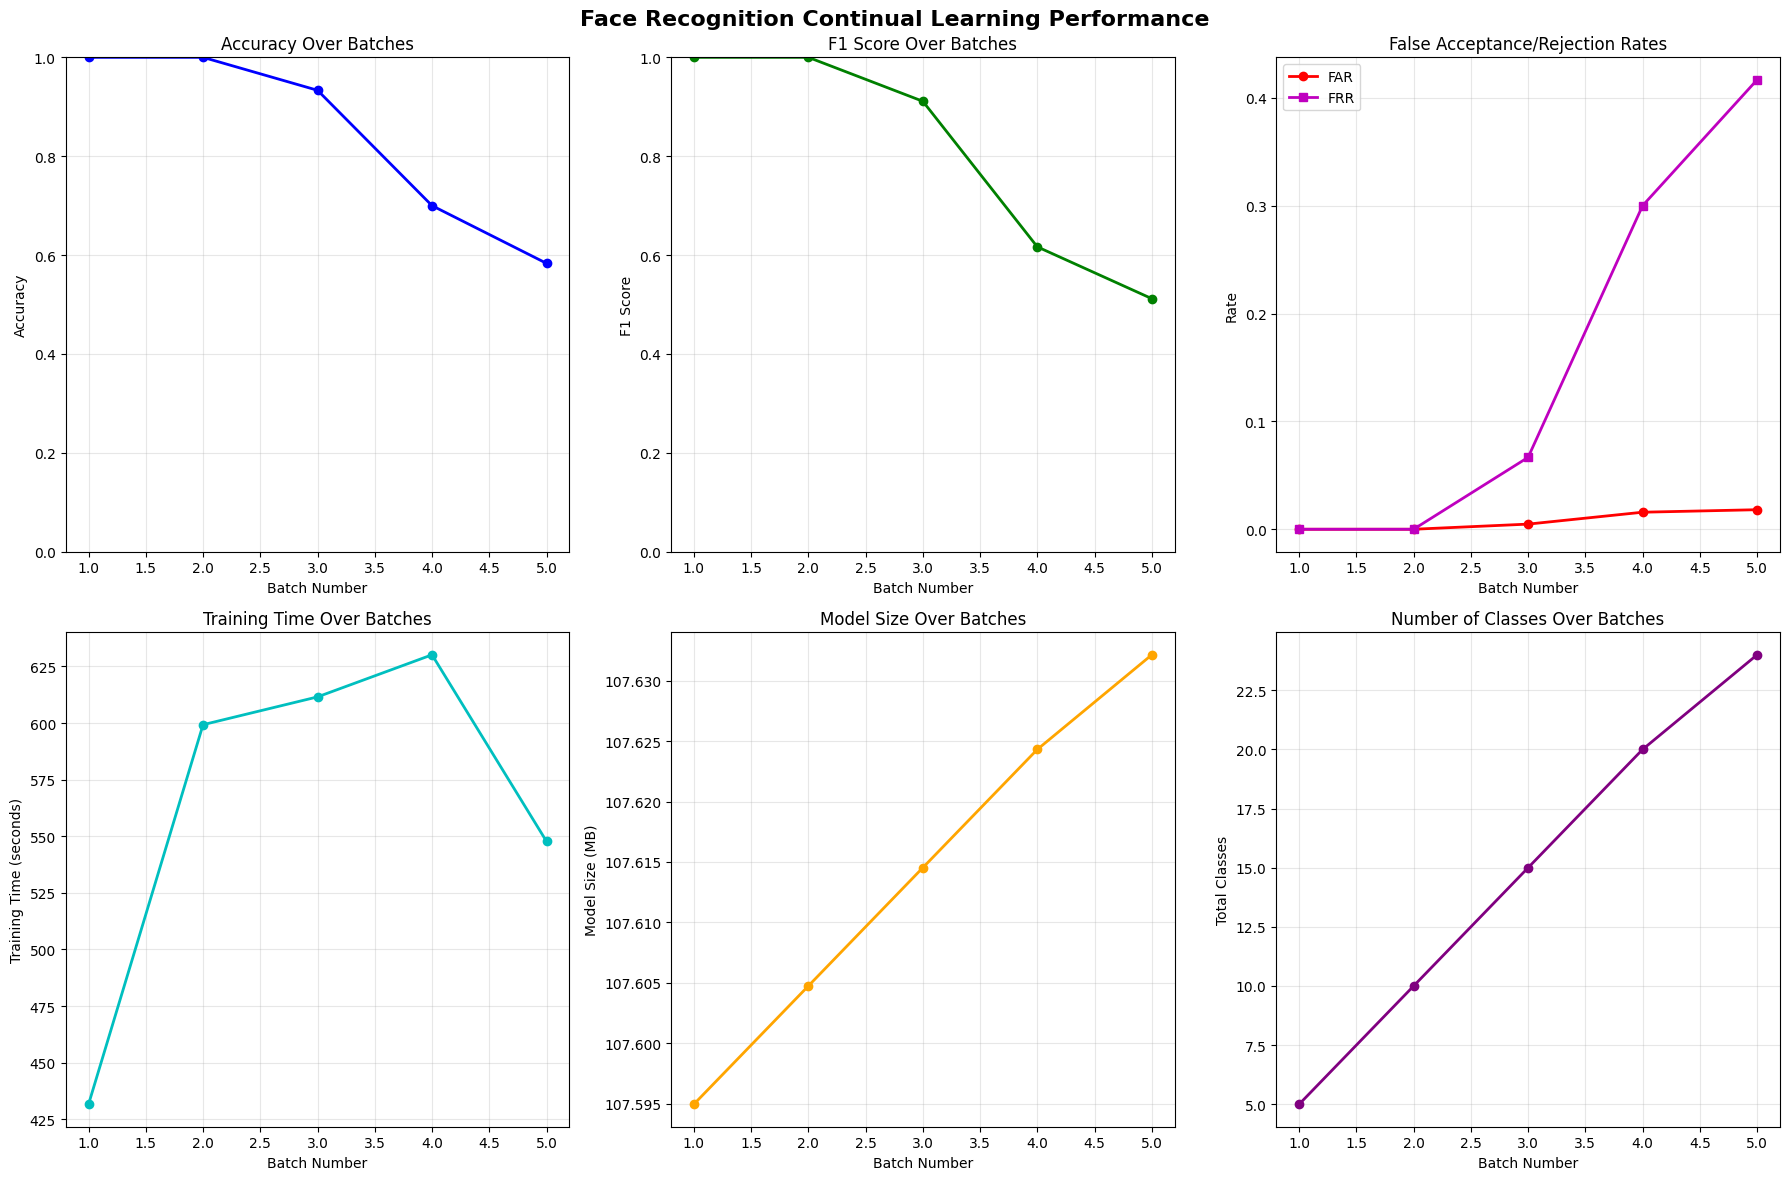

Performance plots saved to: /content/drive/MyDrive/Colab Notebooks/results_2025_06_22_VGGFace_JT/performance_plots.png


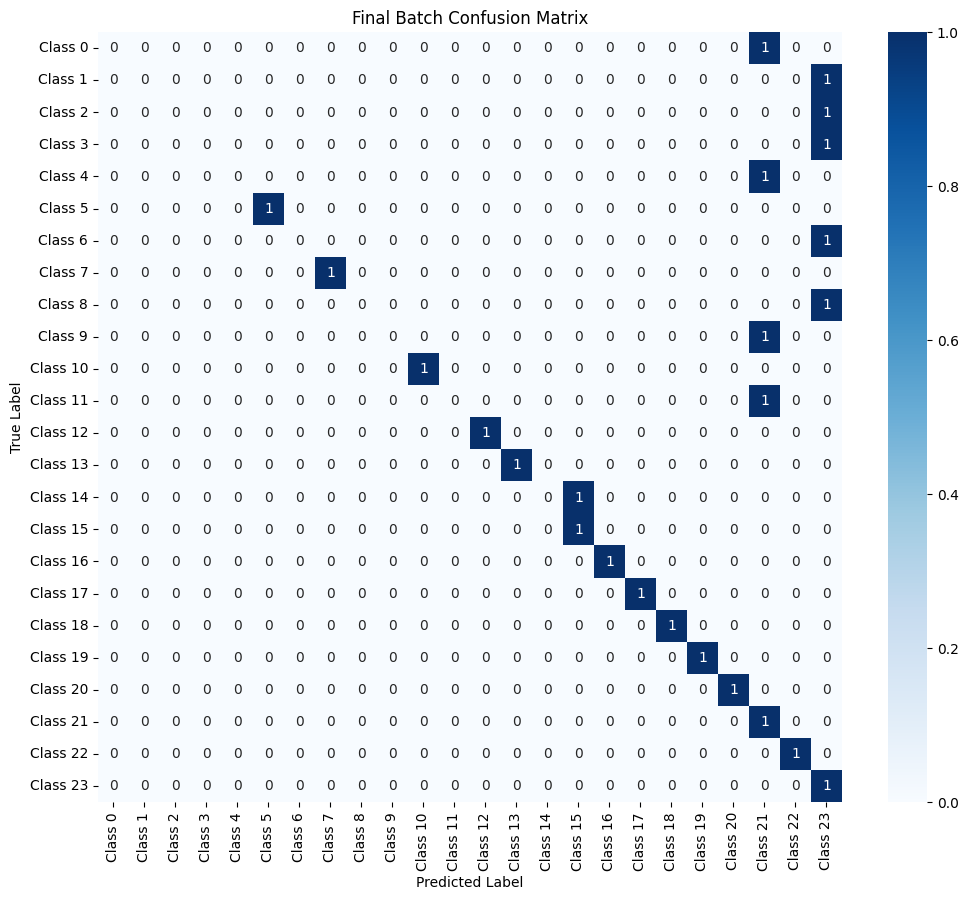

Confusion matrix saved to: /content/drive/MyDrive/Colab Notebooks/results_2025_06_22_VGGFace_JT/final_confusion_matrix.png

Experiment completed successfully!

ADDITIONAL ANALYSIS

CATASTROPHIC FORGETTING ANALYSIS:
--------------------------------------------------
Detected 3 potential forgetting events:
  Batch 3: Accuracy dropped by 0.067 (from 1.000 to 0.933)
  Batch 4: Accuracy dropped by 0.300 (from 1.000 to 0.700)
  Batch 5: Accuracy dropped by 0.417 (from 1.000 to 0.583)
Average accuracy change between batches: -0.1042

BASELINE COMPARISON:
------------------------------
Batch 1: Accuracy=1.000, Random Baseline=0.200, Improvement=0.800
Batch 2: Accuracy=1.000, Random Baseline=0.100, Improvement=0.900
Batch 3: Accuracy=0.933, Random Baseline=0.067, Improvement=0.867
Batch 4: Accuracy=0.700, Random Baseline=0.050, Improvement=0.650
Batch 5: Accuracy=0.583, Random Baseline=0.042, Improvement=0.542
LaTeX table saved to: /content/drive/MyDrive/Colab Notebooks/results_2025_06_22_VGGFa

In [ ]:
#!/usr/bin/env python3
"""
Face Recognition Research Framework
=====================================
This notebook implements a comprehensive face recognition research system using FaceNet
with transfer learning and joint training for continual learning evaluation.

Features:
- Transfer learning from pre-trained FaceNet (VGGFace2)
- Joint training with previous classes
- Comprehensive performance metrics
- Model persistence and loading
- Data augmentation for class balance
"""

# =============================================================================
# IMPORTS AND SETUP
# =============================================================================

import os
import sys
import time
import pickle
import random
import numpy as np
import pandas as pd
from pathlib import Path
from collections import defaultdict, Counter
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning Imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from facenet_pytorch import InceptionResnetV1, MTCNN

# Image Processing
from PIL import Image
import cv2

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

print("Environment Setup Complete!")
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

# =============================================================================
# CONFIGURATION
# =============================================================================

class Config:
    """Configuration class for the face recognition research framework"""

    # Paths
    DATASET_PATH = "/content/drive/MyDrive/Data/lfw5-24P"
    MODEL_SAVE_PATH = "/content/drive/MyDrive/Colab Notebooks/results_2025_06_22_VGGFace_JT"
    RESULTS_PATH = "/content/drive/MyDrive/Colab Notebooks/results_2025_06_22_VGGFace_JT"

    # Training Parameters
    BATCH_SIZE = 5  # Number of persons to train at a time
    EPOCHS_PER_BATCH = 20
    LEARNING_RATE = 0.001
    WEIGHT_DECAY = 1e-4

    # Model Parameters
    EMBEDDING_SIZE = 512
    NUM_CLASSES_PER_BATCH = 5

    # Data Parameters
    IMG_SIZE = 160  # FaceNet input size
    TEST_SPLIT = 1  # Number of images per person for testing
    MIN_IMAGES_PER_PERSON = 10

    # Joint Training Parameters
    PREVIOUS_DATA_RATIO = 0.3  # Ratio of previous data to include
    AUGMENTATION_FACTOR = 2

    # Device
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

config = Config()

# Create necessary directories
os.makedirs(config.MODEL_SAVE_PATH, exist_ok=True)
os.makedirs(config.RESULTS_PATH, exist_ok=True)

# =============================================================================
# DATA UTILITIES
# =============================================================================

class FaceDataset(Dataset):
    """Custom dataset for face recognition with augmentation"""

    def __init__(self, image_paths, labels, transform=None, augment=False):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform
        self.augment = augment

        # Additional augmentation transforms
        self.augment_transform = transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = Image.open(image_path).convert('RGB')

            if self.augment and random.random() > 0.5:
                image = self.augment_transform(image)

            if self.transform:
                image = self.transform(image)

            return image, label
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            # Return a black image if loading fails
            dummy_image = torch.zeros(3, config.IMG_SIZE, config.IMG_SIZE)
            return dummy_image, label

def load_dataset_info(dataset_path):
    """Load dataset information and organize by person"""

    person_data = {}

    for person_folder in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_folder)

        if os.path.isdir(person_path):
            image_files = []
            for img_file in os.listdir(person_path):
                if img_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    image_files.append(os.path.join(person_path, img_file))

            if len(image_files) >= config.MIN_IMAGES_PER_PERSON:
                person_data[person_folder] = image_files
            else:
                print(f"Skipping {person_folder}: Only {len(image_files)} images found")

    print(f"Loaded {len(person_data)} persons with sufficient images")
    return person_data

def create_train_test_split(person_data, test_size=1):
    """Create train/test split for each person"""

    train_data = {}
    test_data = {}

    for person, images in person_data.items():
        # Shuffle images
        shuffled_images = images.copy()
        random.shuffle(shuffled_images)

        # Split
        test_images = shuffled_images[:test_size]
        train_images = shuffled_images[test_size:]

        train_data[person] = train_images
        test_data[person] = test_images

    return train_data, test_data

def prepare_batch_data(person_list, train_data, label_map, previous_data=None, augment_previous=True):
    """Prepare training data for a batch with joint training"""

    image_paths = []
    labels = []

    # Add current batch data
    for person in person_list:
        person_images = train_data[person]
        person_label = label_map[person]

        image_paths.extend(person_images)
        labels.extend([person_label] * len(person_images))

    # Add previous batch data (joint training)
    if previous_data is not None:
        prev_images, prev_labels = previous_data

        if augment_previous:
            # Augment previous data to balance classes
            current_batch_size = len(image_paths)
            previous_size = len(prev_images)

            if previous_size > 0:
                augment_factor = max(1, int(current_batch_size * config.PREVIOUS_DATA_RATIO / previous_size))

                for _ in range(augment_factor):
                    image_paths.extend(prev_images)
                    labels.extend(prev_labels)

    return image_paths, labels

# =============================================================================
# MODEL ARCHITECTURE
# =============================================================================

class FaceNetModel(nn.Module):
    """FaceNet model with custom classifier for continual learning"""

    def __init__(self, num_classes, pretrained=True, embedding_size=512):
        super(FaceNetModel, self).__init__()

        # Load pre-trained InceptionResnetV1
        self.backbone = InceptionResnetV1(
            pretrained='vggface2' if pretrained else None,
            classify=False,
            num_classes=None
        )

        # Freeze backbone initially
        for param in self.backbone.parameters():
            param.requires_grad = False

        # Custom classifier
        self.embedding_size = embedding_size
        self.num_classes = num_classes

        # Classification head
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(512, embedding_size),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(embedding_size, num_classes)
        )

        # Initialize classifier weights
        self._initialize_classifier()

    def _initialize_classifier(self):
        """Initialize classifier weights"""
        for m in self.classifier.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        # Extract features from backbone
        features = self.backbone(x)

        # Apply classifier
        output = self.classifier(features)

        return output, features

    def unfreeze_backbone(self, unfreeze_layers=2):
        """Unfreeze last N layers of backbone for fine-tuning"""
        layers = list(self.backbone.children())

        for layer in layers[-unfreeze_layers:]:
            for param in layer.parameters():
                param.requires_grad = True

    def expand_classifier(self, new_num_classes):
        """Expand classifier for new classes"""
        old_classifier = self.classifier[-1]
        old_weights = old_classifier.weight.data
        old_bias = old_classifier.bias.data

        # Create new classifier
        new_classifier = nn.Linear(self.embedding_size, new_num_classes).to(old_classifier.weight.device)

        # Copy old weights
        new_classifier.weight.data[:self.num_classes] = old_weights
        new_classifier.bias.data[:self.num_classes] = old_bias

        # Initialize new class weights
        nn.init.xavier_uniform_(new_classifier.weight.data[self.num_classes:])
        nn.init.constant_(new_classifier.bias.data[self.num_classes:], 0)

        # Replace classifier
        self.classifier[-1] = new_classifier
        self.num_classes = new_num_classes

# =============================================================================
# TRAINING UTILITIES
# =============================================================================

class FaceRecognitionTrainer:
    """Trainer class for face recognition with continual learning"""

    def __init__(self, config):
        self.config = config
        self.model = None
        self.optimizer = None
        self.scheduler = None
        self.criterion = nn.CrossEntropyLoss()

        # Data transforms
        self.train_transform = transforms.Compose([
            transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

        self.test_transform = transforms.Compose([
            transforms.Resize((config.IMG_SIZE, config.IMG_SIZE)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
        ])

        # Training history
        self.training_history = []
        self.all_trained_persons = []
        self.label_map = {}
        self.reverse_label_map = {}

    def initialize_model(self, num_classes):
        """Initialize model for first batch"""
        self.model = FaceNetModel(num_classes, pretrained=True, embedding_size=self.config.EMBEDDING_SIZE)
        self.model = self.model.to(self.config.DEVICE)

        self.optimizer = optim.Adam(
            self.model.parameters(),
            lr=self.config.LEARNING_RATE,
            weight_decay=self.config.WEIGHT_DECAY
        )

        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.1)

    def expand_model(self, new_total_classes):
        """Expand model for new classes"""
        if self.model is None:
            self.initialize_model(new_total_classes)
        else:
            self.model.expand_classifier(new_total_classes)

            # Update optimizer to include new parameters
            self.optimizer = optim.Adam(
                self.model.parameters(),
                lr=self.config.LEARNING_RATE,
                weight_decay=self.config.WEIGHT_DECAY
            )

            self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.1)

    def train_batch(self, image_paths, labels, batch_persons, epoch_num):
        """Train model on a batch of data"""

        start_time = time.time()

        # Create dataset and dataloader
        train_dataset = FaceDataset(image_paths, labels, transform=self.train_transform, augment=True)
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)

        # Training loop
        self.model.train()
        epoch_losses = []

        for epoch in range(self.config.EPOCHS_PER_BATCH):
            running_loss = 0.0
            correct = 0
            total = 0

            for batch_idx, (images, targets) in enumerate(train_loader):
                images, targets = images.to(self.config.DEVICE), targets.to(self.config.DEVICE)

                self.optimizer.zero_grad()

                outputs, features = self.model(images)
                loss = self.criterion(outputs, targets)

                loss.backward()
                self.optimizer.step()

                running_loss += loss.item()
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()

            epoch_loss = running_loss / len(train_loader)
            epoch_acc = 100.0 * correct / total
            epoch_losses.append(epoch_loss)

            if epoch % 5 == 0:
                print(f"Batch {epoch_num}, Epoch {epoch+1}/{self.config.EPOCHS_PER_BATCH}: "
                      f"Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.2f}%")

            self.scheduler.step()

        training_time = time.time() - start_time

        # Update training history
        self.training_history.append({
            'batch': epoch_num,
            'persons': batch_persons,
            'training_time': training_time,
            'final_loss': epoch_losses[-1],
            'avg_loss': np.mean(epoch_losses)
        })

        print(f"Batch {epoch_num} training completed in {training_time:.2f} seconds")

        return training_time

    def evaluate_model(self, test_data, all_persons):
        """Comprehensive model evaluation"""

        start_time = time.time()

        # Prepare test data
        test_image_paths = []
        test_labels = []

        for person in all_persons:
            if person in test_data:
                person_images = test_data[person]
                person_label = self.label_map.get(person, -1)

                if person_label != -1:
                    test_image_paths.extend(person_images)
                    test_labels.extend([person_label] * len(person_images))

        if not test_image_paths:
            return None

        # Create test dataset
        test_dataset = FaceDataset(test_image_paths, test_labels, transform=self.test_transform)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

        # Evaluation
        self.model.eval()
        all_predictions = []
        all_targets = []
        all_scores = []

        with torch.no_grad():
            for images, targets in test_loader:
                images, targets = images.to(self.config.DEVICE), targets.to(self.config.DEVICE)

                outputs, features = self.model(images)
                probabilities = F.softmax(outputs, dim=1)

                _, predicted = outputs.max(1)

                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())
                all_scores.extend(probabilities.cpu().numpy())

        execution_time = time.time() - start_time

        # Calculate metrics
        metrics = self.calculate_metrics(all_targets, all_predictions, all_scores, execution_time)

        return metrics

    def calculate_metrics(self, y_true, y_pred, y_scores, execution_time):
        """Calculate comprehensive evaluation metrics"""

        # Basic metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        # Calculate FAR and FRR
        n_classes = len(np.unique(y_true))
        far_scores = []
        frr_scores = []

        for i in range(n_classes):
            # True positives, false positives, false negatives, true negatives
            tp = cm[i, i]
            fp = cm[:, i].sum() - tp
            fn = cm[i, :].sum() - tp
            tn = cm.sum() - (tp + fp + fn)

            # FAR (False Acceptance Rate) = FP / (FP + TN)
            far = fp / (fp + tn) if (fp + tn) > 0 else 0
            far_scores.append(far)

            # FRR (False Rejection Rate) = FN / (FN + TP)
            frr = fn / (fn + tp) if (fn + tp) > 0 else 0
            frr_scores.append(frr)

        avg_far = np.mean(far_scores)
        avg_frr = np.mean(frr_scores)

        # Model size
        model_size = self.get_model_size()

        metrics = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'far': avg_far,
            'frr': avg_frr,
            'execution_time': execution_time,
            'model_size_mb': model_size,
            'confusion_matrix': cm,
            'num_classes': n_classes,
            'num_samples': len(y_true)
        }

        return metrics

    def get_model_size(self):
        """Calculate model size in MB"""
        if self.model is None:
            return 0

        param_size = 0
        for param in self.model.parameters():
            param_size += param.nelement() * param.element_size()

        buffer_size = 0
        for buffer in self.model.buffers():
            buffer_size += buffer.nelement() * buffer.element_size()

        size_mb = (param_size + buffer_size) / 1024 / 1024
        return size_mb

    def save_model(self, batch_num, persons):
        """Save model checkpoint"""
        save_path = os.path.join(self.config.MODEL_SAVE_PATH, f'facenet_batch_{batch_num}.pth')

        checkpoint = {
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'scheduler_state_dict': self.scheduler.state_dict(),
            'batch_num': batch_num,
            'persons': persons,
            'label_map': self.label_map,
            'reverse_label_map': self.reverse_label_map,
            'all_trained_persons': self.all_trained_persons,
            'num_classes': self.model.num_classes
        }

        torch.save(checkpoint, save_path)
        print(f"Model saved to {save_path}")

        return save_path

    def load_model(self, checkpoint_path):
        """Load model checkpoint"""
        checkpoint = torch.load(checkpoint_path, map_location=self.config.DEVICE)

        # Initialize model with correct number of classes
        num_classes = checkpoint['num_classes']
        self.initialize_model(num_classes)

        # Load state dicts
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        self.scheduler.load_state_dict(checkpoint['scheduler_state_dict'])

        # Load metadata
        self.label_map = checkpoint['label_map']
        self.reverse_label_map = checkpoint['reverse_label_map']
        self.all_trained_persons = checkpoint['all_trained_persons']

        print(f"Model loaded from {checkpoint_path}")

# =============================================================================
# MAIN RESEARCH FRAMEWORK
# =============================================================================

class FaceRecognitionResearch:
    """Main research framework for continual face recognition learning"""

    def __init__(self, config):
        self.config = config
        self.trainer = FaceRecognitionTrainer(config)
        self.results = []
        self.person_data = None
        self.train_data = None
        self.test_data = None

    def setup_dataset(self):
        """Setup dataset and splits"""
        print("Setting up dataset...")

        # Load dataset
        self.person_data = load_dataset_info(self.config.DATASET_PATH)

        if len(self.person_data) < self.config.BATCH_SIZE:
            raise ValueError(f"Not enough persons in dataset. Found {len(self.person_data)}, need at least {self.config.BATCH_SIZE}")

        # Create train/test splits
        self.train_data, self.test_data = create_train_test_split(
            self.person_data,
            test_size=self.config.TEST_SPLIT
        )

        print(f"Dataset setup complete. Total persons: {len(self.person_data)}")

        # Show dataset statistics
        train_counts = [len(images) for images in self.train_data.values()]
        test_counts = [len(images) for images in self.test_data.values()]

        print(f"Train images per person - Min: {min(train_counts)}, Max: {max(train_counts)}, Avg: {np.mean(train_counts):.1f}")
        print(f"Test images per person - Min: {min(test_counts)}, Max: {max(test_counts)}, Avg: {np.mean(test_counts):.1f}")

    def run_experiment(self):
        """Run the complete continual learning experiment"""

        print("Starting Face Recognition Continual Learning Experiment")
        print("=" * 60)

        # Setup dataset
        self.setup_dataset()

        # Get list of all persons
        all_persons = list(self.person_data.keys())
        random.shuffle(all_persons)  # Randomize order

        # Split into batches
        person_batches = [all_persons[i:i + self.config.BATCH_SIZE]
                         for i in range(0, len(all_persons), self.config.BATCH_SIZE)]

        print(f"Created {len(person_batches)} batches of {self.config.BATCH_SIZE} persons each")

        # Variables for joint training
        previous_training_data = None
        current_label_idx = 0

        # Process each batch
        for batch_idx, batch_persons in enumerate(person_batches):
            print(f"\n{'='*20} BATCH {batch_idx + 1}/{len(person_batches)} {'='*20}")
            print(f"Training persons: {batch_persons}")

            # Update label mapping
            for person in batch_persons:
                if person not in self.trainer.label_map:
                    self.trainer.label_map[person] = current_label_idx
                    self.trainer.reverse_label_map[current_label_idx] = person
                    current_label_idx += 1

            # Add to all trained persons
            self.trainer.all_trained_persons.extend(batch_persons)

            # Expand model for new classes
            total_classes = len(self.trainer.all_trained_persons)
            self.trainer.expand_model(total_classes)

            print(f"Model expanded to {total_classes} classes")

            # Prepare training data with joint training
            train_images, train_labels = prepare_batch_data(
                batch_persons,
                self.train_data,
                self.trainer.label_map,
                previous_training_data,
                augment_previous=True
            )

            print(f"Prepared {len(train_images)} training images")
            print(f"Class distribution: {Counter(train_labels)}")

            # Train on batch
            print(f"\nTraining batch {batch_idx + 1}...")
            training_time = self.trainer.train_batch(
                train_images,
                train_labels,
                batch_persons,
                batch_idx + 1
            )

            # Evaluate on all trained persons so far
            print(f"\nEvaluating on all {len(self.trainer.all_trained_persons)} trained persons...")
            metrics = self.trainer.evaluate_model(self.test_data, self.trainer.all_trained_persons)

            if metrics is not None:
                # Add batch-specific information
                metrics.update({
                    'batch_num': batch_idx + 1,
                    'batch_persons': batch_persons,
                    'total_trained_persons': len(self.trainer.all_trained_persons),
                    'training_time': training_time,
                    'relearning_time': training_time  # Same as training time in this setup
                })

                self.results.append(metrics)

                # Print results
                self.print_batch_results(metrics)

                # Save model
                model_path = self.trainer.save_model(batch_idx + 1, batch_persons)

            # Prepare previous data for next iteration (joint training)
            if len(train_images) > 0:
                # Sample some images from current batch for next iteration
                sample_size = min(len(train_images), int(len(train_images) * 0.3))
                indices = random.sample(range(len(train_images)), sample_size)

                prev_images = [train_images[i] for i in indices]
                prev_labels = [train_labels[i] for i in indices]

                previous_training_data = (prev_images, prev_labels)

            print(f"Batch {batch_idx + 1} completed successfully!")

        # Generate final report
        self.generate_final_report()

        print("\nExperiment completed successfully!")
        return self.results

    def print_batch_results(self, metrics):
        """Print results for a batch"""
        print(f"\n--- Batch {metrics['batch_num']} Results ---")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1_score']:.4f}")
        print(f"False Acceptance Rate: {metrics['far']:.4f}")
        print(f"False Rejection Rate: {metrics['frr']:.4f}")
        print(f"Execution Time: {metrics['execution_time']:.4f} seconds")
        print(f"Training Time: {metrics['training_time']:.4f} seconds")
        print(f"Model Size: {metrics['model_size_mb']:.2f} MB")
        print(f"Total Classes: {metrics['num_classes']}")
        print(f"Test Samples: {metrics['num_samples']}")

    def generate_final_report(self):
        """Generate comprehensive final report"""

        if not self.results:
            print("No results to report!")
            return

        print("\n" + "="*80)
        print("FINAL EXPERIMENT REPORT")
        print("="*80)

        # Create results DataFrame
        df_results = pd.DataFrame(self.results)

        # Summary statistics
        print("\nSUMMARY STATISTICS:")
        print("-" * 40)

        metrics_to_summarize = ['accuracy', 'precision', 'recall', 'f1_score', 'far', 'frr',
                               'execution_time', 'training_time', 'model_size_mb']

        for metric in metrics_to_summarize:
            if metric in df_results.columns:
                mean_val = df_results[metric].mean()
                std_val = df_results[metric].std()
                min_val = df_results[metric].min()
                max_val = df_results[metric].max()

                print(f"{metric.upper():20}: Mean={mean_val:.4f}, Std={std_val:.4f}, Min={min_val:.4f}, Max={max_val:.4f}")

        # Batch-wise performance
        print(f"\nBATCH-WISE PERFORMANCE:")
        print("-" * 40)

        for _, row in df_results.iterrows():
            print(f"Batch {row['batch_num']:2d}: Acc={row['accuracy']:.3f}, "
                  f"F1={row['f1_score']:.3f}, FAR={row['far']:.3f}, "
                  f"Time={row['training_time']:.1f}s, Classes={row['total_trained_persons']}")

        # Save results
        results_file = os.path.join(self.config.RESULTS_PATH, 'experiment_results.csv')
        df_results.to_csv(results_file, index=False)
        print(f"\nResults saved to: {results_file}")

        # Save detailed results
        detailed_results_file = os.path.join(self.config.RESULTS_PATH, 'detailed_results.pkl')
        with open(detailed_results_file, 'wb') as f:
            pickle.dump(self.results, f)
        print(f"Detailed results saved to: {detailed_results_file}")

        # Generate plots
        self.generate_performance_plots(df_results)

    def generate_performance_plots(self, df_results):
        """Generate performance visualization plots"""

        print("\nGenerating performance plots...")

        # Set up the plotting style
        plt.style.use('default')
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Face Recognition Continual Learning Performance', fontsize=16, fontweight='bold')

        # Plot 1: Accuracy over batches
        axes[0, 0].plot(df_results['batch_num'], df_results['accuracy'], 'b-o', linewidth=2, markersize=6)
        axes[0, 0].set_title('Accuracy Over Batches')
        axes[0, 0].set_xlabel('Batch Number')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].set_ylim([0, 1])

        # Plot 2: F1 Score over batches
        axes[0, 1].plot(df_results['batch_num'], df_results['f1_score'], 'g-o', linewidth=2, markersize=6)
        axes[0, 1].set_title('F1 Score Over Batches')
        axes[0, 1].set_xlabel('Batch Number')
        axes[0, 1].set_ylabel('F1 Score')
        axes[0, 1].grid(True, alpha=0.3)
        axes[0, 1].set_ylim([0, 1])

        # Plot 3: FAR and FRR over batches
        axes[0, 2].plot(df_results['batch_num'], df_results['far'], 'r-o', label='FAR', linewidth=2, markersize=6)
        axes[0, 2].plot(df_results['batch_num'], df_results['frr'], 'm-s', label='FRR', linewidth=2, markersize=6)
        axes[0, 2].set_title('False Acceptance/Rejection Rates')
        axes[0, 2].set_xlabel('Batch Number')
        axes[0, 2].set_ylabel('Rate')
        axes[0, 2].legend()
        axes[0, 2].grid(True, alpha=0.3)

        # Plot 4: Training Time over batches
        axes[1, 0].plot(df_results['batch_num'], df_results['training_time'], 'c-o', linewidth=2, markersize=6)
        axes[1, 0].set_title('Training Time Over Batches')
        axes[1, 0].set_xlabel('Batch Number')
        axes[1, 0].set_ylabel('Training Time (seconds)')
        axes[1, 0].grid(True, alpha=0.3)

        # Plot 5: Model Size over batches
        axes[1, 1].plot(df_results['batch_num'], df_results['model_size_mb'], 'orange', marker='o', linewidth=2, markersize=6)
        axes[1, 1].set_title('Model Size Over Batches')
        axes[1, 1].set_xlabel('Batch Number')
        axes[1, 1].set_ylabel('Model Size (MB)')
        axes[1, 1].grid(True, alpha=0.3)

        # Plot 6: Number of Classes over batches
        axes[1, 2].plot(df_results['batch_num'], df_results['total_trained_persons'], 'purple', marker='o', linewidth=2, markersize=6)
        axes[1, 2].set_title('Number of Classes Over Batches')
        axes[1, 2].set_xlabel('Batch Number')
        axes[1, 2].set_ylabel('Total Classes')
        axes[1, 2].grid(True, alpha=0.3)

        plt.tight_layout()

        # Save plots
        plots_file = os.path.join(self.config.RESULTS_PATH, 'performance_plots.png')
        plt.savefig(plots_file, dpi=300, bbox_inches='tight')
        plt.show()
        print(f"Performance plots saved to: {plots_file}")

        # Generate confusion matrix heatmap for final batch
        if len(self.results) > 0:
            final_cm = self.results[-1]['confusion_matrix']

            plt.figure(figsize=(12, 10))
            sns.heatmap(final_cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=[f'Class {i}' for i in range(final_cm.shape[1])],
                       yticklabels=[f'Class {i}' for i in range(final_cm.shape[0])])
            plt.title('Final Batch Confusion Matrix')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')

            cm_file = os.path.join(self.config.RESULTS_PATH, 'final_confusion_matrix.png')
            plt.savefig(cm_file, dpi=300, bbox_inches='tight')
            plt.show()
            print(f"Confusion matrix saved to: {cm_file}")

# =============================================================================
# UTILITY FUNCTIONS FOR ANALYSIS
# =============================================================================

def analyze_catastrophic_forgetting(results):
    """Analyze catastrophic forgetting patterns"""

    print("\nCATASTROPHIC FORGETTING ANALYSIS:")
    print("-" * 50)

    if len(results) < 2:
        print("Not enough batches to analyze forgetting.")
        return

    # Track accuracy degradation
    max_accuracy = 0
    forgetting_events = []

    for i, result in enumerate(results):
        current_acc = result['accuracy']

        if current_acc > max_accuracy:
            max_accuracy = current_acc
        elif current_acc < max_accuracy - 0.05:  # 5% threshold
            forgetting_amount = max_accuracy - current_acc
            forgetting_events.append({
                'batch': i + 1,
                'forgetting': forgetting_amount,
                'prev_max': max_accuracy,
                'current': current_acc
            })

    if forgetting_events:
        print(f"Detected {len(forgetting_events)} potential forgetting events:")
        for event in forgetting_events:
            print(f"  Batch {event['batch']}: Accuracy dropped by {event['forgetting']:.3f} "
                  f"(from {event['prev_max']:.3f} to {event['current']:.3f})")
    else:
        print("No significant catastrophic forgetting detected.")

    # Calculate average forgetting
    if len(results) > 1:
        acc_changes = []
        for i in range(1, len(results)):
            acc_change = results[i]['accuracy'] - results[i-1]['accuracy']
            acc_changes.append(acc_change)

        avg_change = np.mean(acc_changes)
        print(f"Average accuracy change between batches: {avg_change:.4f}")

def compare_with_baseline(results):
    """Compare with theoretical baseline performance"""

    print("\nBASELINE COMPARISON:")
    print("-" * 30)

    for result in results:
        num_classes = result['total_trained_persons']
        random_baseline = 1.0 / num_classes
        improvement = result['accuracy'] - random_baseline

        print(f"Batch {result['batch_num']}: "
              f"Accuracy={result['accuracy']:.3f}, "
              f"Random Baseline={random_baseline:.3f}, "
              f"Improvement={improvement:.3f}")

def generate_latex_table(results, output_file=None):
    """Generate LaTeX table for research paper"""

    latex_table = """
\\begin{table}[h]
\\centering
\\caption{Face Recognition Continual Learning Results}
\\label{tab:results}
\\begin{tabular}{|c|c|c|c|c|c|c|c|}
\\hline
Batch & Classes & Accuracy & Precision & Recall & F1 & FAR & FRR \\\\
\\hline
"""

    for result in results:
        latex_table += f"{result['batch_num']} & {result['total_trained_persons']} & "
        latex_table += f"{result['accuracy']:.3f} & {result['precision']:.3f} & "
        latex_table += f"{result['recall']:.3f} & {result['f1_score']:.3f} & "
        latex_table += f"{result['far']:.3f} & {result['frr']:.3f} \\\\\n"

    latex_table += """\\hline
\\end{tabular}
\\end{table}
"""

    if output_file:
        with open(output_file, 'w') as f:
            f.write(latex_table)
        print(f"LaTeX table saved to: {output_file}")

    return latex_table

# =============================================================================
# MAIN EXECUTION FUNCTIONS
# =============================================================================

def run_face_recognition_experiment():
    """Main function to run the complete experiment"""

    # Initialize configuration
    config = Config()

    # Create research framework
    research = FaceRecognitionResearch(config)

    try:
        # Run experiment
        results = research.run_experiment()

        # Additional analysis
        print("\n" + "="*80)
        print("ADDITIONAL ANALYSIS")
        print("="*80)

        analyze_catastrophic_forgetting(results)
        compare_with_baseline(results)

        # Generate LaTeX table
        latex_file = os.path.join(config.RESULTS_PATH, 'results_table.tex')
        generate_latex_table(results, latex_file)

        return results

    except Exception as e:
        print(f"Experiment failed with error: {e}")
        import traceback
        traceback.print_exc()
        return None

def load_and_analyze_results(results_file):
    """Load and analyze previously saved results"""

    try:
        with open(results_file, 'rb') as f:
            results = pickle.load(f)

        print(f"Loaded {len(results)} batch results from {results_file}")

        # Re-run analysis
        analyze_catastrophic_forgetting(results)
        compare_with_baseline(results)

        return results

    except Exception as e:
        print(f"Failed to load results: {e}")
        return None

def test_single_batch():
    """Test function for debugging single batch training"""

    config = Config()
    config.EPOCHS_PER_BATCH = 5  # Reduced for testing

    # Initialize components
    trainer = FaceRecognitionTrainer(config)

    # Load a small subset of data
    person_data = load_dataset_info(config.DATASET_PATH)
    train_data, test_data = create_train_test_split(person_data, test_size=1)

    # Take first 5 persons
    test_persons = list(person_data.keys())[:5]

    # Setup labels
    for i, person in enumerate(test_persons):
        trainer.label_map[person] = i
        trainer.reverse_label_map[i] = person

    trainer.all_trained_persons = test_persons

    # Initialize model
    trainer.initialize_model(len(test_persons))

    # Prepare data
    train_images, train_labels = prepare_batch_data(
        test_persons, train_data, trainer.label_map
    )

    print(f"Testing with {len(train_images)} images from {len(test_persons)} persons")

    # Train
    training_time = trainer.train_batch(train_images, train_labels, test_persons, 1)

    # Evaluate
    metrics = trainer.evaluate_model(test_data, test_persons)

    if metrics:
        print("\nTest Results:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"F1 Score: {metrics['f1_score']:.4f}")
        print(f"Training Time: {training_time:.2f}s")
        print(f"Model Size: {metrics['model_size_mb']:.2f} MB")

    return metrics

# =============================================================================
# EXAMPLE USAGE AND EXECUTION
# =============================================================================

if __name__ == "__main__":
    print("Face Recognition Continual Learning Research Framework")
    print("=" * 60)

    # Choose execution mode
    print("\nExecution Options:")
    print("1. Run full experiment")
    print("2. Test single batch (for debugging)")
    print("3. Load and analyze previous results")

    # For notebook usage, you can directly call:

    # Option 1: Run full experiment
    print("\n>>> Running Full Experiment <<<")
    results = run_face_recognition_experiment()

    # Option 2: Test single batch (uncomment to use)
    # print("\n>>> Testing Single Batch <<<")
    # test_results = test_single_batch()

    # Option 3: Load previous results (uncomment and provide path)
    # results_path = "/content/drive/MyDrive/Results/detailed_results.pkl"
    # results = load_and_analyze_results(results_path)

    print("\nExecution completed!")

# =============================================================================
# ADDITIONAL HELPER FUNCTIONS
# =============================================================================

def visualize_sample_images(dataset_path, num_persons=3, images_per_person=5):
    """Visualize sample images from the dataset"""

    person_data = load_dataset_info(dataset_path)
    persons = list(person_data.keys())[:num_persons]

    fig, axes = plt.subplots(num_persons, images_per_person, figsize=(15, 8))
    fig.suptitle('Sample Dataset Images', fontsize=16)

    for i, person in enumerate(persons):
        images = person_data[person][:images_per_person]

        for j, img_path in enumerate(images):
            try:
                img = Image.open(img_path).convert('RGB')

                if num_persons == 1:
                    axes[j].imshow(img)
                    axes[j].set_title(f'{person}')
                    axes[j].axis('off')
                else:
                    axes[i, j].imshow(img)
                    axes[i, j].set_title(f'{person}' if j == 0 else '')
                    axes[i, j].axis('off')
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    plt.tight_layout()
    plt.show()

def check_dataset_structure(dataset_path):
    """Check and report dataset structure"""

    print("DATASET STRUCTURE ANALYSIS:")
    print("-" * 40)

    if not os.path.exists(dataset_path):
        print(f"Dataset path does not exist: {dataset_path}")
        return False

    person_folders = [f for f in os.listdir(dataset_path)
                     if os.path.isdir(os.path.join(dataset_path, f))]

    print(f"Total person folders found: {len(person_folders)}")

    image_counts = []
    valid_persons = 0

    for person in person_folders:
        person_path = os.path.join(dataset_path, person)
        images = [f for f in os.listdir(person_path)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

        image_counts.append(len(images))

        if len(images) >= Config.MIN_IMAGES_PER_PERSON:
            valid_persons += 1

        if len(images) < 5:  # Show persons with very few images
            print(f"  Warning: {person} has only {len(images)} images")

    print(f"Valid persons (>= {Config.MIN_IMAGES_PER_PERSON} images): {valid_persons}")
    print(f"Images per person - Min: {min(image_counts)}, Max: {max(image_counts)}, Avg: {np.mean(image_counts):.1f}")

    if valid_persons >= Config.BATCH_SIZE:
        print("✓ Dataset is suitable for the experiment")
        return True
    else:
        print("✗ Dataset is not suitable for the experiment")
        print(f"  Need at least {Config.BATCH_SIZE} persons with {Config.MIN_IMAGES_PER_PERSON}+ images each")
        return False

# Quick dataset check function call
print("\n" + "="*60)
print("DATASET VALIDATION")
print("="*60)
dataset_valid = check_dataset_structure(Config.DATASET_PATH)

if dataset_valid:
    print("\n" + "="*60)
    print("SAMPLE IMAGES PREVIEW")
    print("="*60)
    # Uncomment to show sample images
    # visualize_sample_images(Config.DATASET_PATH, num_persons=3, images_per_person=3)